In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [5]:
import os
print(os.path.exists("C:/Users/jaisi chawra/Downloads/neo.csv"))




False


In [6]:
df=pd.read_csv(r'C:/Users/jaisi  chawra/OneDrive/Desktop/minor.ipynb/neo.csv/neo.csv')

In [7]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [8]:
starting_data=df.copy()
starting_data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [9]:
starting_data.shape

(90836, 10)

In [10]:
df['miss_distance']=df['miss_distance'].apply(lambda x: round(x,2))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


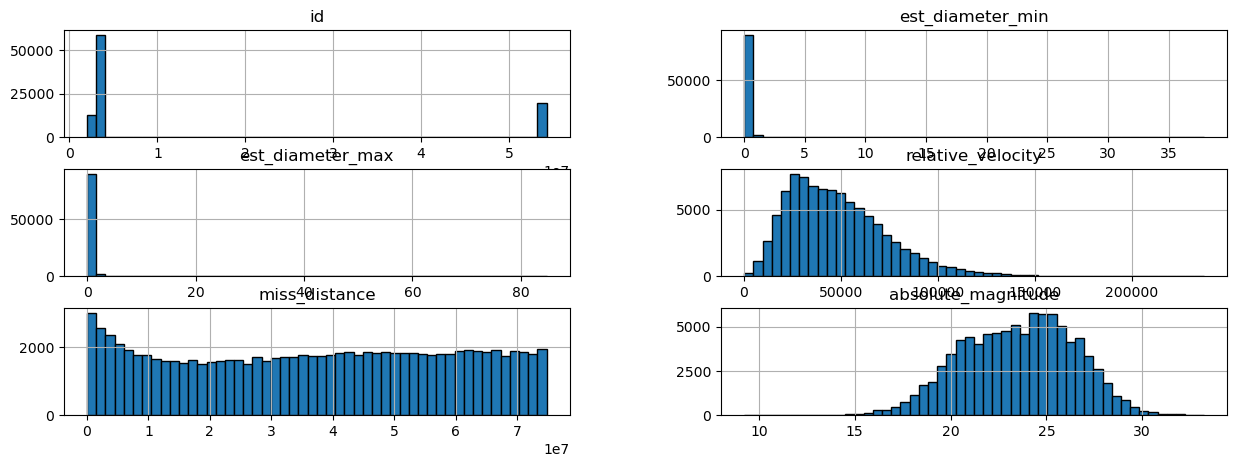

In [12]:
df.hist(figsize=(15,5), bins=50, edgecolor='k')
plt.show()

In [13]:
print(df['hazardous'].value_counts())


hazardous
False    81996
True      8840
Name: count, dtype: int64


In [14]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745530e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [15]:
df.drop(['id','sentry_object','orbiting_body'],axis=1,inplace=True)

In [16]:
df.columns

Index(['name', 'est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude', 'hazardous'],
      dtype='object')

Finding correlation between the variables

In [17]:
print(df.dtypes)


name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object


In [18]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [19]:
correlation_matrix = numeric_df.corr()

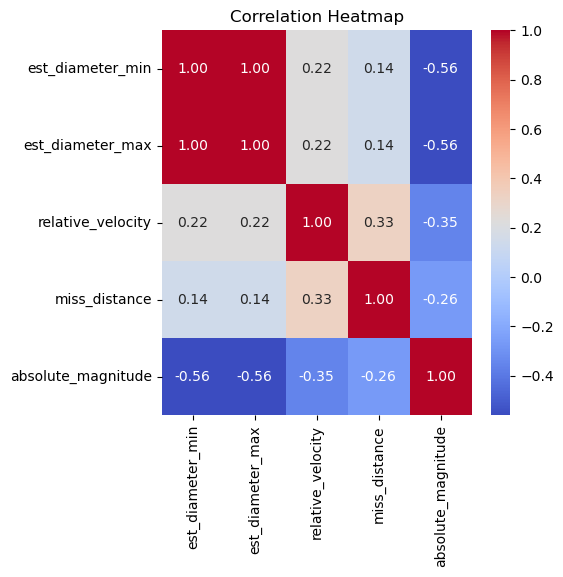

In [20]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
df.insert(4, 'est_diameter diff', df['est_diameter_max'] - df['est_diameter_min'])


In [22]:
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,est_diameter diff,miss_distance,absolute_magnitude,hazardous
0,162635 (2000 SS164),1.198271,2.679415,13569.249224,1.481144,54839744.08,16.73,False
1,277475 (2005 WK4),0.265800,0.594347,73588.726663,0.328547,61438126.52,20.00,True
2,512244 (2015 YE18),0.722030,1.614507,114258.692129,0.892478,49798724.94,17.83,False
3,(2012 BV13),0.096506,0.215794,24764.303138,0.119288,25434972.72,22.20,False
4,(2014 GE35),0.255009,0.570217,42737.733765,0.315208,46275567.00,20.09,True


In [23]:
df['name']=df['name'].apply(lambda x:x.split("(")[1])

In [24]:
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,est_diameter diff,miss_distance,absolute_magnitude,hazardous
0,2000 SS164),1.198271,2.679415,13569.249224,1.481144,54839744.08,16.73,False
1,2005 WK4),0.265800,0.594347,73588.726663,0.328547,61438126.52,20.00,True
2,2015 YE18),0.722030,1.614507,114258.692129,0.892478,49798724.94,17.83,False
3,2012 BV13),0.096506,0.215794,24764.303138,0.119288,25434972.72,22.20,False
4,2014 GE35),0.255009,0.570217,42737.733765,0.315208,46275567.00,20.09,True


In [25]:
df['hazardous']=df['hazardous'].apply(lambda x: 0 if x==False else 1)

In [26]:
df['name']=df['name'].apply(lambda x: x.split(" ")[0])
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,est_diameter diff,miss_distance,absolute_magnitude,hazardous
0,2000,1.198271,2.679415,13569.249224,1.481144,54839744.08,16.73,0
1,2005,0.265800,0.594347,73588.726663,0.328547,61438126.52,20.00,1
2,2015,0.722030,1.614507,114258.692129,0.892478,49798724.94,17.83,0
3,2012,0.096506,0.215794,24764.303138,0.119288,25434972.72,22.20,0
4,2014,0.255009,0.570217,42737.733765,0.315208,46275567.00,20.09,1


EDA

In [27]:
con=[i for i in df.select_dtypes(include=["int64","float64"])]
con

['est_diameter_min',
 'est_diameter_max',
 'relative_velocity',
 'est_diameter diff',
 'miss_distance',
 'absolute_magnitude',
 'hazardous']

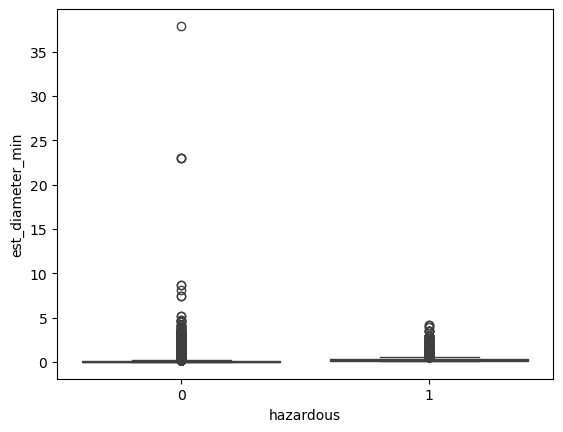

In [28]:
sns.boxplot(y='est_diameter_min',x='hazardous',data=df)
plt.show()

removing outliers

In [29]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,est_diameter_min,est_diameter_max,relative_velocity,est_diameter diff,miss_distance,absolute_magnitude,hazardous
count,90836.000000,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000,90836.000000
mean,0.127432,0.284947,48066.918918,0.157515,3.706655e+07,23.527103,0.097318
std,0.298511,0.667491,25293.296961,0.368980,2.235204e+07,2.894086,0.296392
min,0.000609,0.001362,203.346433,0.000753,6.745530e+03,9.230000,0.000000
25%,0.019256,0.043057,28619.020645,0.023801,1.721082e+07,21.340000,0.000000
50%,0.048368,0.108153,44190.117890,0.059786,3.784658e+07,23.700000,0.000000
75%,0.143402,0.320656,62923.604633,0.177255,5.654900e+07,25.700000,0.000000
90%,0.305179,0.682402,82071.928548,0.377222,6.749341e+07,27.200000,0.000000
95%,0.470495,1.052059,95214.588889,0.581564,7.117708e+07,28.000000,1.000000
99%,1.081075,2.417358,123461.247316,1.336283,7.410730e+07,29.529500,1.000000


In [30]:
outliers = df['est_diameter diff'].quantile(0.99)
df_outliers = df[df['est_diameter diff'] > outliers]



In [31]:
df=df[df['est_diameter diff']<=1.336282802484964]
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,est_diameter diff,miss_distance,absolute_magnitude,hazardous
1,2005,0.265800,0.594347,73588.726663,0.328547,61438126.52,20.00,1
2,2015,0.722030,1.614507,114258.692129,0.892478,49798724.94,17.83,0
3,2012,0.096506,0.215794,24764.303138,0.119288,25434972.72,22.20,0
4,2014,0.255009,0.570217,42737.733765,0.315208,46275567.00,20.09,1
5,2021,0.036354,0.081291,34297.587778,0.044936,40585691.23,24.32,0


In [32]:
df.shape

(89927, 8)

In [33]:
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,est_diameter diff,miss_distance,absolute_magnitude,hazardous
1,2005,0.265800,0.594347,73588.726663,0.328547,61438126.52,20.00,1
2,2015,0.722030,1.614507,114258.692129,0.892478,49798724.94,17.83,0
3,2012,0.096506,0.215794,24764.303138,0.119288,25434972.72,22.20,0
4,2014,0.255009,0.570217,42737.733765,0.315208,46275567.00,20.09,1
5,2021,0.036354,0.081291,34297.587778,0.044936,40585691.23,24.32,0


In [34]:
x=df.iloc[:,1:-1]
x.head()

,est_diameter_min,est_diameter_max,relative_velocity,est_diameter diff,miss_distance,absolute_magnitude
1,0.265800,0.594347,73588.726663,0.328547,61438126.52,20.00
2,0.722030,1.614507,114258.692129,0.892478,49798724.94,17.83
3,0.096506,0.215794,24764.303138,0.119288,25434972.72,22.20
4,0.255009,0.570217,42737.733765,0.315208,46275567.00,20.09
5,0.036354,0.081291,34297.587778,0.044936,40585691.23,24.32


In [35]:
y=df.iloc[:,-1]
y.head()

1    1
2    0
3    0
4    1
5    0
Name: hazardous, dtype: int64

In [36]:
y.value_counts()

hazardous
0    81316
1     8611
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = scaler.fit_transform(x)

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [39]:
from collections import Counter
print("before smote",Counter(y))

before smote Counter({0: 81316, 1: 8611})


In [40]:
x,y=smote.fit_resample(x,y)

In [41]:
print("after smote",Counter(y))

after smote Counter({1: 81316, 0: 81316})


In [42]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = scaler.fit_transform(x)

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()

In [44]:
model.fit(x,y)

ExtraTreesClassifier()

In [45]:
model.feature_importances_

array([0.22515305, 0.17931794, 0.1270656 , 0.15026841, 0.10582966,
       0.21236534])

In [46]:
feature_importance = pd.Series(model.feature_importances_, index=['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'est_diameter diff', 'miss_distance', 'absolute_magnitude'])


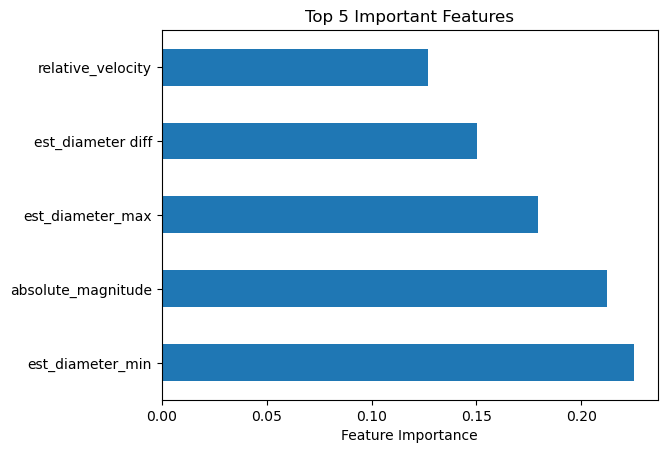

In [47]:
feature_importance.nlargest(5).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 5 Important Features')
plt.show()

In [48]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)

In [49]:
for i,j in folds.split(x,y):
    x_train,x_test, y_train, y_test= x[i],x[j],y[i],y[j]

In [50]:
print(x_train.shape, y_train.shape)

(146369, 6) (146369,)


In [51]:
print(x_test.shape, y_test.shape)

(16263, 6) (16263,)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [53]:
rf=RandomForestClassifier()

In [54]:
rf_random=RandomizedSearchCV(rf,param_distributions={'criterion':["gini"]},cv=folds,verbose=2)

In [55]:
rf_random.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .....................................criterion=gini; total time=  43.4s
[CV] END .....................................criterion=gini; total time=  43.9s
[CV] END .....................................criterion=gini; total time=  43.0s
[CV] END .....................................criterion=gini; total time=  43.6s
[CV] END .....................................criterion=gini; total time=  43.4s
[CV] END .....................................criterion=gini; total time=  42.0s
[CV] END .....................................criterion=gini; total time=  41.7s
[CV] END .....................................criterion=gini; total time=  42.0s
[CV] END .....................................criterion=gini; total time=  42.8s
[CV] END .....................................criterion=gini; total time=  42.8s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini']}, verbose=2)

In [56]:
rf_random.best_score_

0.9478032955228098

In [57]:
y_pred=rf_random.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8132
           1       0.95      0.99      0.97      8131

    accuracy                           0.97     16263
   macro avg       0.97      0.97      0.97     16263
weighted avg       0.97      0.97      0.97     16263



In [59]:
confusion_matrix(y_test,y_pred)

array([[7715,  417],
       [  97, 8034]], dtype=int64)

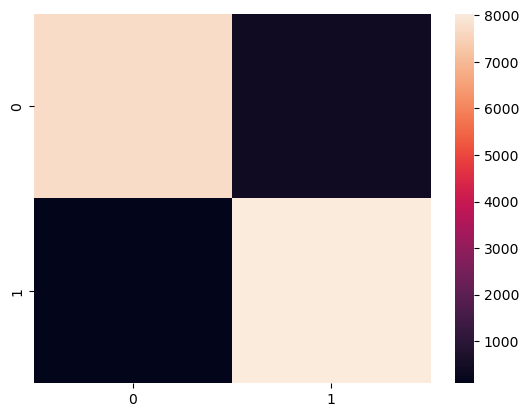

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred))
plt.show()

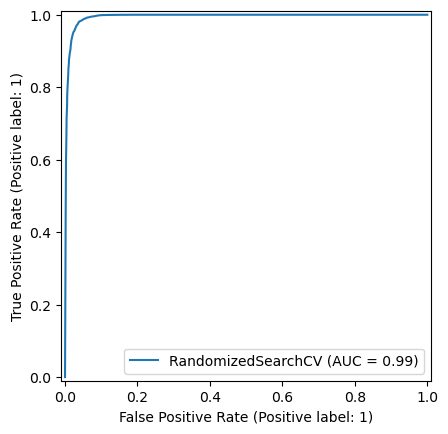

In [61]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_random, x_test, y_test)
plt.show()

In [62]:
import joblib

joblib.dump(rf_random, 'model.pkl')

['model.pkl']

In [64]:
import numpy as np
predictions = model.predict(x_test)
np.unique(predictions, return_counts=True)

(array([0, 1], dtype=int64), array([8132, 8131], dtype=int64))